In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid")

In [2]:
#Variables that need to be set by the user
data_dir = "data"
analysis_dir = "ResNet34_weighted_lr0.001_decay0.0_epochs10_batch64_accuracy"

#Initialising variables
root = os.path.dirname(os.getcwd())
log_files = [log for log in glob.glob(os.path.join(root, data_dir, "output", analysis_dir, "*.log"))]
accuracy = True if "accuracy" in analysis_dir else False

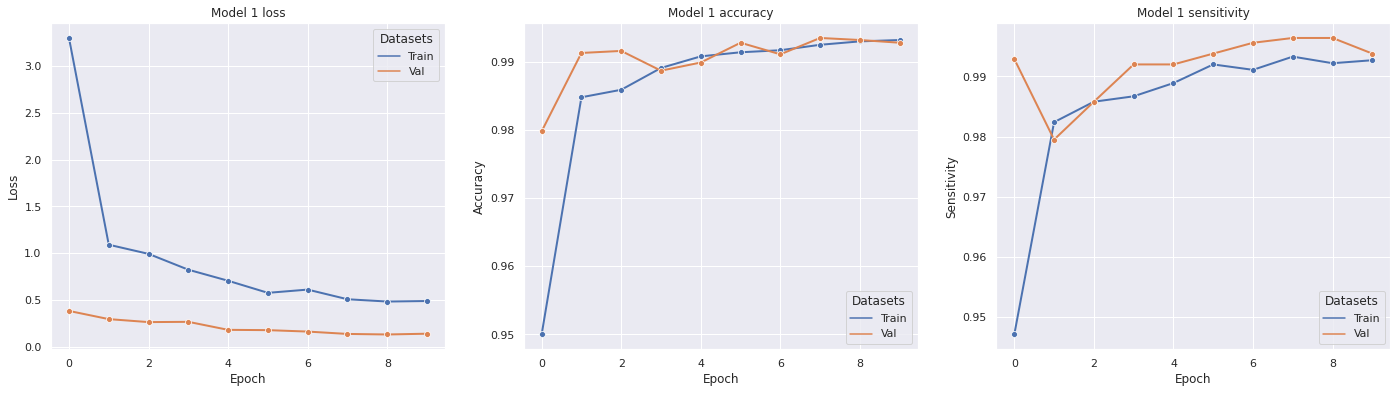

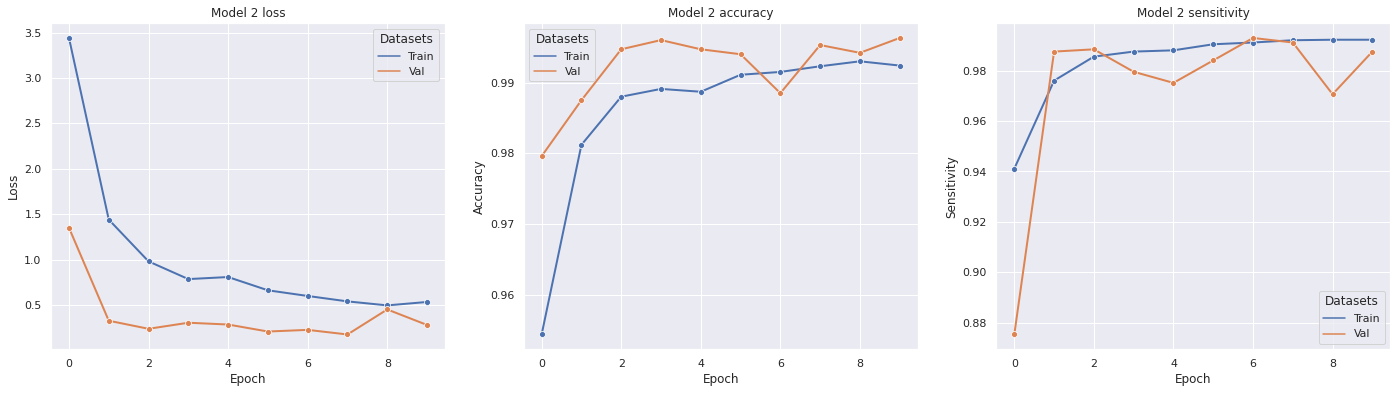

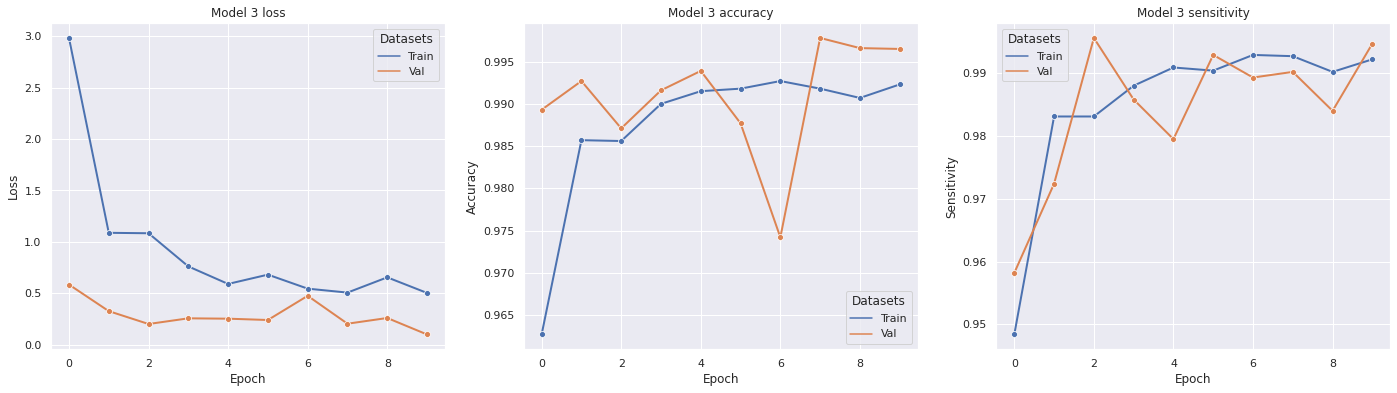

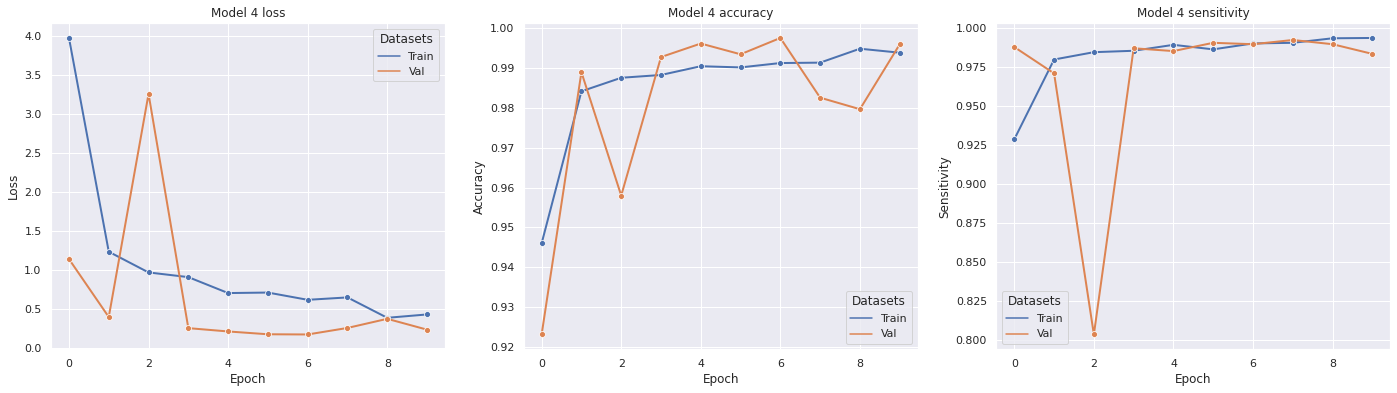

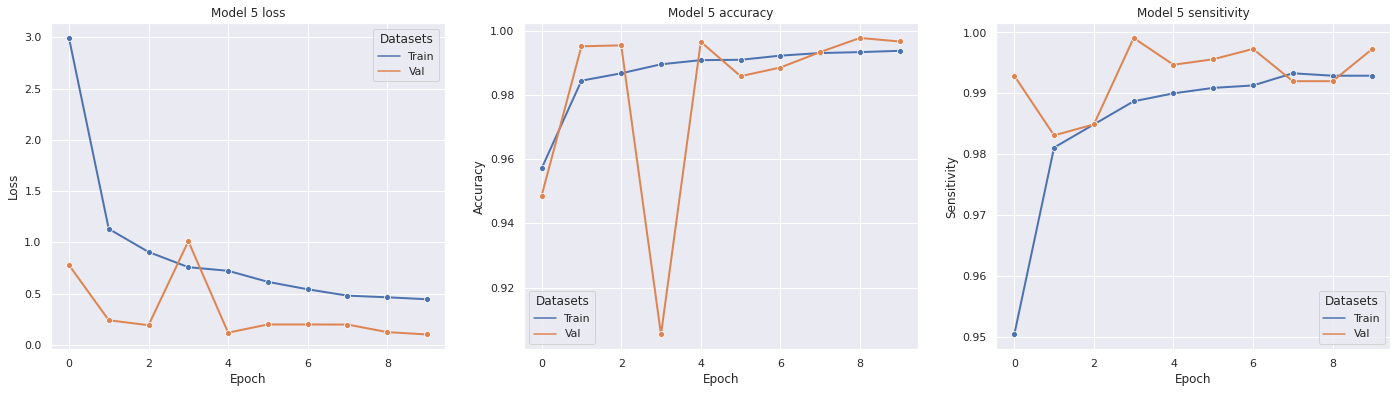

In [3]:
#Looping over the log files
for idx, log in enumerate(sorted(log_files)):
    
    #Reading in the loss content
    with open(log) as f:
        content = f.readlines()[148:158]
        lines = [" ".join(c.strip().split("\t")[1:3]).split(" ") for c in content]
        df = pd.DataFrame({"Losses": [float(line[2]) for line in lines] + [float(line[11]) for line in lines],
                           "Accuracies": [float(line[4]) for line in lines] + [float(line[13]) for line in lines],
                           "Sensitivities": [float(line[6]) for line in lines] + [float(line[15]) for line in lines],
                           "Datasets": ["Train" for line in lines] + ["Val" for line in lines],
                           "Epochs": list(range(0,10)) + list(range(0,10))})
        
        #Creating a plot from the losses  
        fig, axs = plt.subplots(ncols=3, figsize=(24,6))
        sns.lineplot(data=df, x="Epochs", y="Losses", hue="Datasets", ax=axs[0], marker="o", linewidth=2)
        axs[0].set_title("Model {} loss".format(idx+1))
        axs[0].set_xlabel("Epoch")
        axs[0].set_ylabel("Loss")
        sns.lineplot(data=df, x="Epochs", y="Accuracies", hue="Datasets", ax=axs[1], marker="o", linewidth=2)
        axs[1].set_title("Model {} accuracy".format(idx+1))
        axs[1].set_xlabel("Epoch")
        axs[1].set_ylabel("Accuracy")
        sns.lineplot(data=df, x="Epochs", y="Sensitivities", hue="Datasets", ax=axs[2], marker="o", linewidth=2)
        axs[2].set_title("Model {} sensitivity".format(idx+1))
        axs[2].set_xlabel("Epoch")
        axs[2].set_ylabel("Sensitivity")
        plt.show()